# This Notebook contains the code for the Sentiment and ARIMA analysis of the stock index

In [12]:
#Importing modules which would be required

import pandas as pd
import numpy as np
from textblob import TextBlob
import yfinance as yf
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [25]:
#Reading the combined news

d1 = pd.read_csv('Combined_News_DJIA.csv')
d1.head(3)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."


In [87]:
#Dow Jones Industrial Average Index from Yahoo Finance

d2=yf.download("^DJI", start='2008-08-08', end='2016-07-02')

[*********************100%***********************]  1 of 1 completed


In [15]:
d2.tail(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,17694.679688,106380000
2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,17929.990234,133030000
2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,17949.369141,82160000


In [16]:
d2.shape

(1989, 6)

In [17]:
d2.reset_index(level=0, inplace=True)

In [18]:
d2.shape

(1989, 7)

In [19]:
d2.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,11734.320312,212830000
1,2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,11782.349609,183190000
2,2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,11642.469727,173590000


In [29]:
#Merge datasets

merge= d1.merge(d2, how='inner', on='Date')

In [27]:
k=d1.dtypes
print(k)

Date     object
Label     int64
Top1     object
Top2     object
Top3     object
Top4     object
Top5     object
Top6     object
Top7     object
Top8     object
Top9     object
Top10    object
Top11    object
Top12    object
Top13    object
Top14    object
Top15    object
Top16    object
Top17    object
Top18    object
Top19    object
Top20    object
Top21    object
Top22    object
Top23    object
Top24    object
Top25    object
dtype: object


In [28]:
d1['Date']=pd.to_datetime(d1['Date'])

In [30]:
#Show merged data (News + Stock Index parameters)

merge

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top22,Top23,Top24,Top25,Open,High,Low,Close,Adj Close,Volume
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",11432.089844,11759.959961,11388.040039,11734.320312,11734.320312,212830000
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",11729.669922,11867.110352,11675.530273,11782.349609,11782.349609,183190000
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",11781.700195,11782.349609,11601.519531,11642.469727,11642.469727,173590000
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...,11632.809570,11633.780273,11453.339844,11532.959961,11532.959961,182550000
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,"b'Will the Russians conquer Tblisi? Bet on it,...",...,b'Taliban wages war on humanitarian aid workers',"b'Russia: World ""can forget about"" Georgia\'s...",b'Darfur rebels accuse Sudan of mounting major...,b'Philippines : Peace Advocate say Muslims nee...,11532.070312,11718.280273,11450.889648,11615.929688,11615.929688,159790000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,2016-06-27,0,Barclays and RBS shares suspended from trading...,Pope says Church should ask forgiveness from g...,Poland 'shocked' by xenophobic abuse of Poles ...,"There will be no second referendum, cabinet ag...","Scotland welcome to join EU, Merkel ally says",Sterling dips below Friday's 31-year low amid ...,No negative news about South African President

In [31]:
#Combining headlines into one column

headlines= []
for row in range(0,len(merge.index)):
    headlines.append(' '.join( str(x) for x in merge.iloc[row, 2:27]))

In [32]:
headlines[0]

'b"Georgia \'downs two Russian warplanes\' as countries move to brink of war" b\'BREAKING: Musharraf to be impeached.\' b\'Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube)\' b\'Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fire\' b"Afghan children raped with \'impunity,\' U.N. official says - this is sick, a three year old was raped and they do nothing" b\'150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets.\' b"Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SO\'s side" b"The \'enemy combatent\' trials are nothing but a sham: Salim Haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it." b\'Georgian troops retreat from S. Osettain capital, presumably leaving several hundred people killed. [VIDEO]\' b\'Did the U.S. Prep Georgia for War with Russia?\'

In [33]:
#Cleaning the headlines

cl_head=[]
for i in range(0,len(headlines)):
    cl_head.append(re.sub("b[(')]",'',headlines[i]))
    cl_head[i]=re.sub('b[(")]','', cl_head[i])
    cl_head[i]=re.sub("\'",'', cl_head[i])

In [34]:
#Cleaned data

cl_head[20]

'A French judge has ordered two branches of Scientologists and their leaders to stand trial for fraud   Russia in legal bid to ban South Park 60 Minutes Cut Ahmadinejads Statement, Solution Is Democracy in Israel/Palestine" U.S. drones kill 13 in missile attack in Pakistan Screw You, TSA: No Conviction on Key Charges in Liquid-Bomb Trial in London Scientology on trial for fraud in France! An EU ban on ads with sexist overtones? Another quasi-fictional piece of translucent flimflam Film Backs Afghans Claims of US Killings [of 90+ civilians] Giant Buddha found at Afghan site. After denying strenously the US reopens inquiry into Afghan attack that may have killed upto 90 civilians Videos surface showing dead Afghan children after US raid, sparking a new investigation "Consortium" of Media Execs to Canadian Green Party:  You can\\t participate in debate because the other parties don\\t want you there. Everything going wrong in the world .. in one convenient graphical display.  Until yester

In [35]:
#Merging the combined news column

merge['Combined_News']= cl_head
merge['Combined_News'][0]

'Georgia downs two Russian warplanes as countries move to brink of war" BREAKING: Musharraf to be impeached. Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube) Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fire Afghan children raped with impunity, U.N. official says - this is sick, a three year old was raped and they do nothing" 150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets. Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SOs side" The enemy combatent trials are nothing but a sham: Salim Haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it." Georgian troops retreat from S. Osettain capital, presumably leaving several hundred people killed. [VIDEO] Did the U.S. Prep Georgia for War with Russia? Rice Gives Green Light for Israel to Attack Iran: S

In [36]:
merge.head(3)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top23,Top24,Top25,Open,High,Low,Close,Adj Close,Volume,Combined_News
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",11432.089844,11759.959961,11388.040039,11734.320312,11734.320312,212830000,Georgia downs two Russian warplanes as countri...
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",11729.669922,11867.110352,11675.530273,11782.349609,11782.349609,183190000,Why wont America and Nato help us? If they won...
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",11781.700195,11782.349609,11601.519531,11642.469727,11642.469727,173590000,Remember that adorable 9-year-old who sang at ...


In [37]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [38]:
#Obtaining Subjectivity and Polarity scores

merge['Subjectivity']=merge['Combined_News'].apply(getSubjectivity)
merge['Polarity']=merge['Combined_News'].apply(getPolarity)

In [39]:
merge.head(3)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top25,Open,High,Low,Close,Adj Close,Volume,Combined_News,Subjectivity,Polarity
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,"b""No Help for Mexico's Kidnapping Surge""",11432.089844,11759.959961,11388.040039,11734.320312,11734.320312,212830000,Georgia downs two Russian warplanes as countri...,0.267549,-0.048568
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,"b""So this is what it's come to: trading sex fo...",11729.669922,11867.110352,11675.530273,11782.349609,11782.349609,183190000,Why wont America and Nato help us? If they won...,0.374806,0.121956
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",11781.700195,11782.349609,11601.519531,11642.469727,11642.469727,173590000,Remember that adorable 9-year-old who sang at ...,0.536234,-0.044302


In [34]:
#Polarity- -1 to 1
#Subjectivity- 0- Objective 1- subjective

In [40]:
def getSIA(text):
    sia= SentimentIntensityAnalyzer()
    senti=sia.polarity_scores(text)
    return senti

In [41]:
#Obtaing Sentiment Scores for the Combined News

compound=[]
neg=[]
pos=[]
neu=[]
SIA=0 
for i in range(0, len(merge['Combined_News'])):
    SIA=getSIA(merge['Combined_News'][i])
    compound.append(SIA['compound'])
    neg.append(SIA['neg'])
    neu.append(SIA['neu'])
    pos.append(SIA['pos'])

In [42]:
#Sentiment score in dataset

merge['Compound']= compound
merge['Negative']= neg
merge['Neutral']= neu
merge['Positive']= pos


In [43]:
merge.head(3)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Close,Adj Close,Volume,Combined_News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,11734.320312,11734.320312,212830000,Georgia downs two Russian warplanes as countri...,0.267549,-0.048568,-0.9982,0.235,0.724,0.041
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,11782.349609,11782.349609,183190000,Why wont America and Nato help us? If they won...,0.374806,0.121956,-0.9858,0.191,0.721,0.089
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,11642.469727,11642.469727,173590000,Remember that adorable 9-year-old who sang at ...,0.536234,-0.044302,-0.9715,0.128,0.816,0.056


In [44]:
keep_columns=['Open','High','Low','Volume','Subjectivity','Polarity','Compound','Negative','Positive','Label']
df=merge[keep_columns]
df

,Open,High,Low,Volume,Subjectivity,Polarity,Compound,Negative,Positive,Label
0,11432.089844,11759.959961,11388.040039,212830000,0.267549,-0.048568,-0.9982,0.235,0.041,0
1,11729.669922,11867.110352,11675.530273,183190000,0.374806,0.121956,-0.9858,0.191,0.089,1
2,11781.700195,11782.349609,11601.519531,173590000,0.536234,-0.044302,-0.9715,0.128,0.056,0
3,11632.809570,11633.780273,11453.339844,182550000,0.364021,0.011398,-0.9809,0.146,0.066,0
4,11532.070312,11718.280273,11450.889648,159790000,0.375099,0.040677,-0.9882,0.189,0.094,1
...,...,...,...,...,...,...,...,...,...,...
1984,17355.210938,17355.210938,17063.080078,138740000,0.352311,-0.014015,-0.9644,0.148,0.094,0
1985,17190.509766,17409.720703,17190.509766,112190000,0.352649,0.046560,-0.9571,0.132,0.102,1
1986,17456.019531,17704.509766,17456.019531,106380000,0.389617,0.052622,-0.9975,0.225,0.091,1
1987,17712.759766,17930.609375,17711.800781,133030000,0.382566,0.011243,-0.9977,0.202,0.061,1


In [45]:
#Creation of Feature dataset

x= df
x=np.array(x.drop(['Label'],1))
#Target Dataset
y=np.array(df['Label']) 

C:\Users\aritr\AppData\Local\Temp\ipykernel_19760\2742025757.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x=np.array(x.drop(['Label'],1))


In [46]:
#Spliting the dataset into 7:3

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=0)

In [47]:
#LDA Model is used

model= LinearDiscriminantAnalysis().fit(x_train,y_train)

In [48]:
#Predicting for the x_test dataset

predictions=model.predict(x_test)
predictions

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,

In [49]:
#Comparison with y_test dataset

y_test

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,

In [51]:
#Parameters Obtained

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83       281
           1       0.83      0.89      0.86       316

    accuracy                           0.84       597
   macro avg       0.85      0.84      0.84       597
weighted avg       0.85      0.84      0.84       597



In [60]:
#Importing modules for ARIMA Analysis

import matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

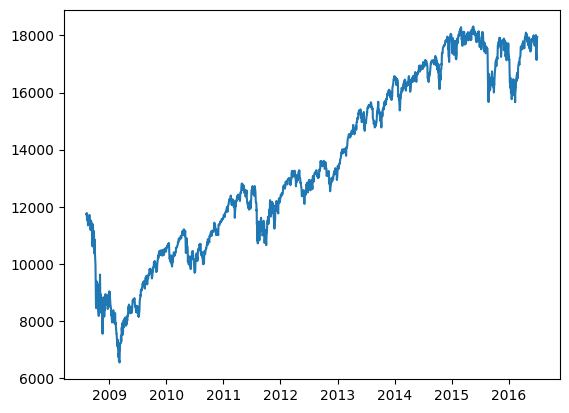

In [88]:
plt.plot(d2.index,d2['Adj Close'])

In [89]:
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

In [90]:
data=list(d2['Close'])

In [91]:
#Dickey Fuller Test

result= adfuller(data)
print("1. ADF: ",result[0])
print("2. P-Value: ",result[1])
print("3. Num OF Lags: ",result[2])
print("4. Num of Observations used for ADF Regression: ",result[3])
print("5. Critical Values: ")
for key, val in result[4].items():
    print("\t",key,": ",val)

1. ADF:  -0.3747127512596374
2. P-Value:  0.9142360000907656
3. Num OF Lags:  20
4. Num of Observations used for ADF Regression:  1968
5. Critical Values: 
	 1% :  -3.4336771595431106
	 5% :  -2.863009746829746
	 10% :  -2.5675524325901415


In [92]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
    

In [93]:
#Using last 200 dataset as testing dataset

x_train=data[:-200]
x_test=data[-200:]
print(len(x_train),len(x_test))

1789 200


In [94]:
#Using Auto Arima to get the correct model for the dataset

stepwise_fit = auto_arima(data,trace=True,suppress_warning=True)
print(stepwise_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=25377.015, Time=0.52 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=25387.154, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=25378.119, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=25377.094, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=25386.100, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=25376.740, Time=0.42 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=25375.905, Time=0.15 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=25376.959, Time=0.18 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=25376.287, Time=0.50 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=25378.451, Time=0.58 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=25375.096, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=25376.208, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=25375.915, Time=0.27 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=25376.096, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0

In [95]:
#Model overview

import statsmodels.api as sm
model= sm.tsa.arima.ARIMA(data, order=(0,1,2))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1989
Model:                 ARIMA(0, 1, 2)   Log Likelihood              -12684.548
Date:                Tue, 25 Jul 2023   AIC                          25375.096
Time:                        12:43:58   BIC                          25391.880
Sample:                             0   HQIC                         25381.261
                               - 1989                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0755      0.015     -4.970      0.000      -0.105      -0.046
ma.L2         -0.0415      0.012     -3.325      0.001      -0.066      -0.017
sigma2      2.044e+04    385.180     53.054      0.000    1.97e+04    2.12e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              1358.36
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.84   Skew:                            -0.37
Prob(H) (two-sided):                  0.02   Kurtosis:                         6.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [96]:
#Predicting Stock Index values

start=len(x_train)
end=len(x_train)+len(x_test)-1
pred= model.predict(start=start,end=end)
pred

array([16718.71950868, 16671.61959676, 16408.0794602 , 16514.38768571,
       16340.12129421, 16292.06822165, 16210.67171074, 16310.58181924,
       16020.88475846, 16059.80408424, 16266.54613061, 16262.26670096,
       16456.27732663, 16743.53778324, 16773.38422588, 16899.86467167,
       17033.59354235, 17074.38701593, 17125.40795047, 17082.79226583,
       16938.48944795, 17132.95836533, 17201.2694408 , 17224.88485235,
       17216.48217343, 17172.54690839, 17467.23838119, 17620.01221039,
       17615.3758569 , 17583.86694742, 17766.15388207, 17748.46531762,
       17670.38149643, 17820.32381732, 17904.19256171, 17866.28610733,
       17865.16435988, 17907.03805679, 17741.9387502 , 17764.30722851,
       17706.23384521, 17470.14046145, 17272.93347282, 17476.47726996,
       17479.8009823 , 17717.18630604, 17720.89743662, 17815.39372228,
       17790.12519435, 17811.46570976, 17812.32986913, 17813.23066484,
       17726.9219421 , 17880.03125255, 17734.33563453, 17503.28891132,
      

In [97]:
s=pd.Series(pred, index=d2.index[-200:])
s

Date
2015-09-17    16718.719509
2015-09-18    16671.619597
2015-09-21    16408.079460
2015-09-22    16514.387686
2015-09-23    16340.121294
                  ...     
2016-06-27    17436.182822
2016-06-28    17187.263210
2016-06-29    17405.200693
2016-06-30    17663.591387
2016-07-01    17897.864158
Length: 200, dtype: float64

<AxesSubplot: xlabel='Date'>

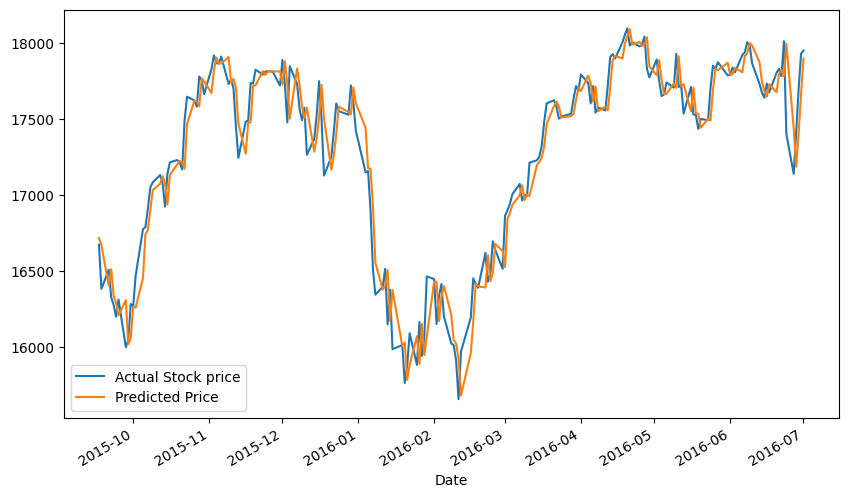

In [98]:
#Predicted Plot of ARIMA model

plt.figure(figsize=(10,6),dpi=100)
d2['Close'][-200:].plot(label='Actual Stock price',legend=True)
s.plot(label='Predicted Price',legend=True)

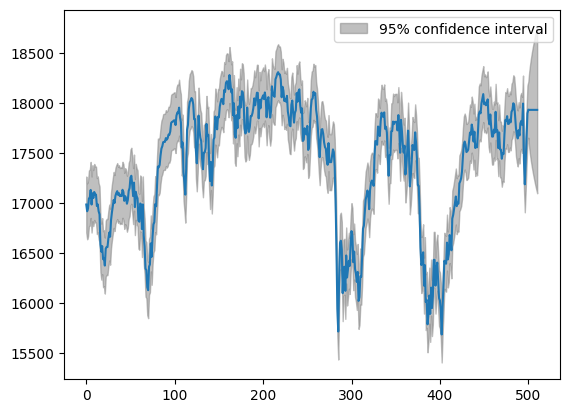

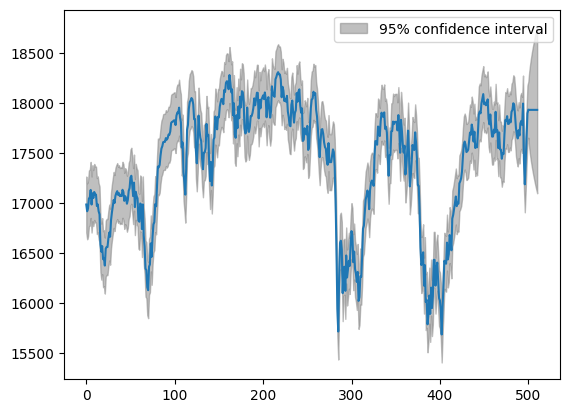

In [99]:
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(model,start=len(data)-500,end=len(data)+10,dynamic=False)

In [100]:
#Mean Square error

from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(x_test,pred))

162.55479571969917

In [101]:
#R^2 Score

from sklearn.metrics import r2_score
r2_score(x_test,pred)

0.9351498366861011

In [102]:
#Predicting the next 4 Closing values of the index

pred_future=model.predict(start=end,end=end+3)
pred_future

array([17897.86415821, 17934.42756037, 17932.29071986, 17932.29071986])

In [103]:
import datetime
start_date=datetime.datetime(2016,7,2)
dates=[start_date + datetime.timedelta(days=i) for i in range(4)]


In [104]:
pred_future2=pd.Series(pred_future,index=dates)
pred_future2

2016-07-02    17897.864158
2016-07-03    17934.427560
2016-07-04    17932.290720
2016-07-05    17932.290720
dtype: float64

<AxesSubplot: xlabel='Date'>

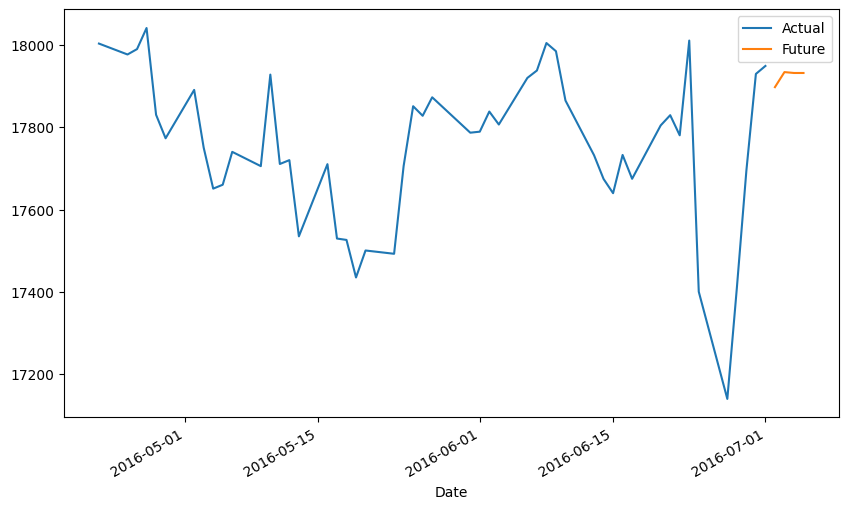

In [105]:
#Plotting the future values

plt.figure(figsize=(10,6),dpi=100)
d2['Close'][-50:].plot(label='Actual',legend=True)
pred_future2.plot(label='Future',legend=True)